## My FitbIt Activity

### This project was inspired by my curiousity into my own use of my FItbIt.  How am I actually using it and what is my activity truly like during 2020 & 2021.  This is only intended for exploratory analysis. 

### Load and inspect data.  The data was downloaded from Fitbit. 

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

'''
Datafiles downloaded from FitBit using the steps identified in this URl:
       https://help.fitbit.com/articles/en_US/Help_article/1133.htm 
The csv files were merged using the following command: 
      copy *.csv merged-fitbit.csv comm
'''

df = pd.concat(map(pd.read_csv, ['.\data\merged_fitbit_2020.csv', '.\data\merged_fitbit_2021.csv']), ignore_index=True)


#print(df)

df.dtypes



Date                       object
Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
dtype: object

In [2]:
'''
Convert datatypes.  
   Date to 'datetime'; 
   Activity, Calories and Steps to integers; FitBit stores these with commas and .csv is intepreting as strings.
'''

df['Date'] = pd.to_datetime(df['Date'])

df['Steps'] = df['Steps'].str.replace(',', '').astype(int)
df['Calories Burned'] = df['Calories Burned'].str.replace(',', '').astype(int)

df['Minutes Sedentary'] = df['Minutes Sedentary'].str.replace(',', '').astype(int)
df['Activity Calories'] = df['Activity Calories'].str.replace(',', '').astype(int)

print(df.dtypes)
print(df.isnull().sum())

Date                      datetime64[ns]
Calories Burned                    int32
Steps                              int32
Distance                         float64
Floors                             int64
Minutes Sedentary                  int32
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int32
dtype: object
Date                      0
Calories Burned           0
Steps                     0
Distance                  0
Floors                    0
Minutes Sedentary         0
Minutes Lightly Active    0
Minutes Fairly Active     0
Minutes Very Active       0
Activity Calories         0
dtype: int64


,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-12-31,1934,7697,3.43,0,1154,272,6,8,910
1,2020-12-30,1911,11676,6.08,0,1244,150,7,39,820
2,2020-12-29,1737,3675,1.59,0,1211,229,0,0,658
3,2020-12-28,1975,10639,5.21,0,1071,248,24,34,969
4,2020-12-27,1648,6454,3.30,0,1202,112,3,39,524


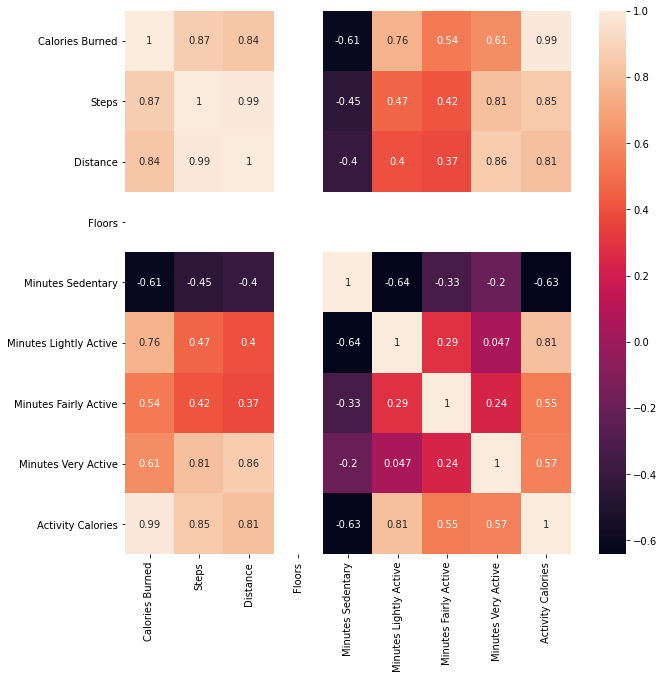

In [3]:
#High level examination of the dataset to determine what to remove and what data is missing.
#Note there are no NULL values to be removed. 

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True);
df.head()


## Data prep

In [4]:
#Remove unnessesary data
#There are no null values in the dataset.

#Drop Floors - my current fitbit does not track floors.  The value will always be zero and provides no value.
df = df.drop(['Floors'], axis=1)

'''
Drop the following columns:  
    - Calories Burned & Distance due to high correlation
        - 'Activity Calories' is a subset of Calories Burned. Activity Calories is of greater interest. 'Calories Burned' includes BMR Calories. 
        - 'Distance' and 'Steps' have a very high correlation. Fitbit distance is a calculation when on an eliptical or stationary bike.
    - 'Minutes Sedentary' 
        - interest only in comparison of the active type minutes
'''


df = df.drop(['Calories Burned','Distance','Minutes Sedentary'], axis=1)
#df = df.drop(['Calories Burned','Distance'], axis=1)


#Relabel activity columns for clarity
df = df.rename(columns={'Minutes Lightly Active': 'Low Intensity Min', 'Minutes Fairly Active': 'Medium Intensity Min',
                        'Minutes Very Active': 'High Intensity Min' , 'Activity Calories' : 'Calories',
                       'Minutes Sedentary': 'Sedentary','Calories Burned': 'BMRCalories'})





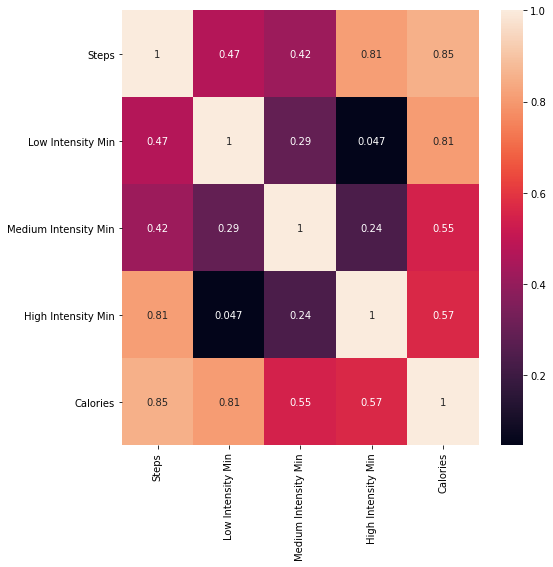

In [5]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(df.corr(),annot=True);


## Identify Day of Week and Weekend;  Build new dataframes

In [6]:
#To compare activity on the weekend vs. weekday, a new boolean feature indicating weekend is added.
#To classify as weekday/weekend, the day of week must also be identified.
#Day and Month labels are also created and added to the dataframe


#Encode day_of_week and weeknd 
#df.dtypes
df['day_of_week'] = df['Date'].dt.dayofweek

#DOW: Saturday = 6; SUnday = 7
df['weekend'] =df['day_of_week'] >= 5
df['day_name'] =df['Date'].dt.day_name()


df_weekday = df[df['weekend'] ==False]
df_weekend = df[df['weekend'] ==True]

#Add month lable
df['month'] = df['Date'].dt.month
df['month_name'] =df['Date'].dt.month_name()




In [7]:
df.head()
df.dtypes

Date                    datetime64[ns]
Steps                            int32
Low Intensity Min                int64
Medium Intensity Min             int64
High Intensity Min               int64
Calories                         int32
day_of_week                      int64
weekend                           bool
day_name                        object
month                            int64
month_name                      object
dtype: object

## Which day of the week did I most commonly NOT wear my fitbit?

[Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Total Days'),
 Text(0.5, 1.0, 'Days without Fitbit')]

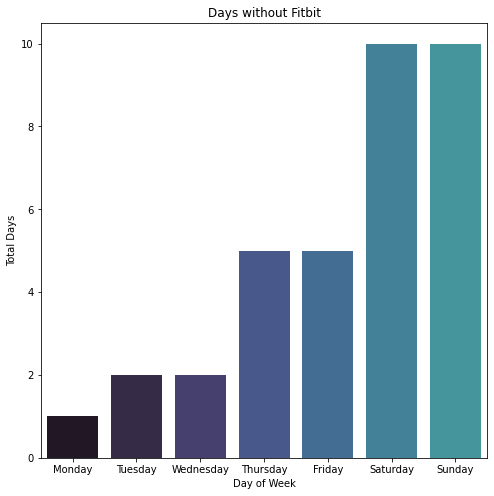

In [8]:
#Days with no step count or no distance indicate the fitbit was not worn.  
#Count and graph the number of days where Steps == 0


sns.set_palette('mako',10)


df_nostep = df[df['Steps'] == 0]
df_nostep


fig, ax = plt.subplots(figsize=(8,8)) 

ax = sns.countplot(data = df_nostep, x='day_name'
                  , order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set(xlabel='Day of Week', ylabel='Total Days', title='Days without Fitbit')

#Option to drop days with no steps for future analysis. The Fitbit was not worn and will skew the true steps taken.
#df = df[df.Steps != 0]





### <font color='blue'>  With week beginning on Monday, as I progress through the week I am less likely to wear the Fitbit. This is not suprising because I don conscienciously NOT wear it on the weekend. However - over 2 years there were only 19 days I did NOT where my Fitbit. That is the most surprising discovery in the data. </font>


##  How does the Step count vary month to month? 

#### Box & whisker function

In [9]:
#Build a box & whisker graph to quickly and visually compare min, median, max and outliers by Steps

def boxwhisker(data,x,y,order):
    
        
    '''
    INPUT
    data = dataframe to test
    x = x axis value
    y = y-axis value
    order = axis order.
    
    OUTPUT
    no output returned
    output printed and graph generated within function
    
    This function will plot a box & whisker plot:
    1. set palette
    2. set figure size
    3. render graph
    '''
    
    
    sns.set_palette('coolwarm_r',12)
    fig, ax = plt.subplots(figsize=(12,12)) 
    ax = sns.boxplot(data = data, x=x, y=y
                 , order = order
                )

    

#### Stripplot function

In [10]:
#Build a SNS Stripplot with the median line.
#This was built using help from Stackoverflow: 
#https://stackoverflow.com/questions/37619952/drawing-points-with-with-median-lines-in-seaborn-using-stripplot  

def plotmedianstrip(data,x, y, xlabel, ylabel,axis_order):
 
    '''
    INPUT
    data = dataframe to test
    x = x axis value
    y = y-axis value
    xlabel = label for the x axis
    ylabel = label for the y axis
    axis_order = axis order.
    
    OUTPUT
    no output returned
    output printed and graph generated within function
    
    This function will build a strip plot and place the median value in a horizontal line on top
    of the stripplot:
    1. set figure size
    2. set axis label
    3. build stripplot using parameters passed into function
    4. build the horizontal line showing the median value on top of the stripplot
    
    '''
    sns.set_palette('turbo',7)
    
    fig, ax = plt.subplots(figsize=(12,12)) 
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax = sns.stripplot( x=x, y=y, data=data
                       , linewidth=1
                       , order = axis_order
                  )
    # distance across the "X" or "Y" stipplot column to span, in this case 40%
    median_width = 0.6

      
    for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df[df[x]==sample_name].Steps.median()

        # plot horizontal lines across the column, centered on the tick
        ax.plot([tick-median_width/3, tick+median_width/3], [median_val, median_val],
                lw=4, color='k')

    plt.show()
    


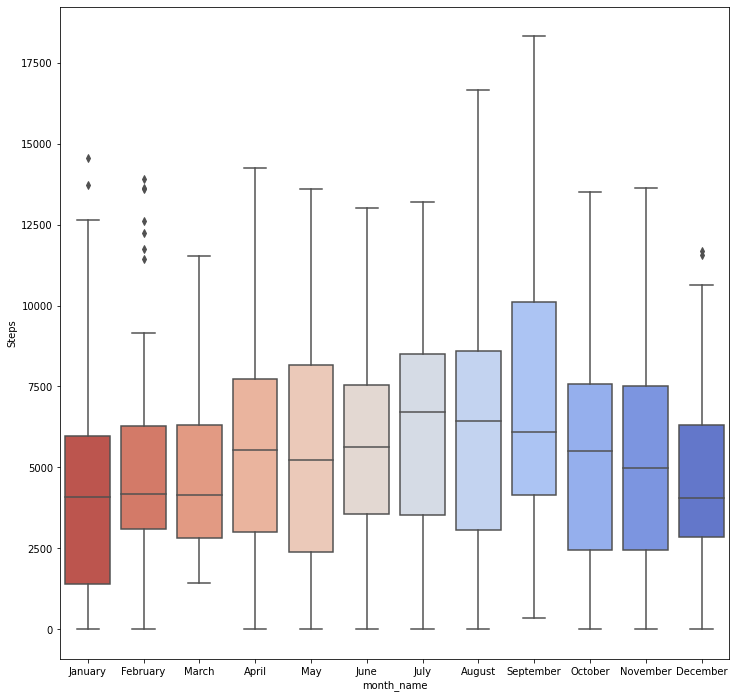

In [11]:
#General box & whisker for month of year using boxwhisker function

'''
x - values for the x-axis
y - values for y-axis
order - the order of the x-axis.  Default is alphabetical
'''


x='month_name'
y='Steps'
order = ['January','February','March','April','May','June', 'July','August','September','October','November','December']

whiskers=boxwhisker(df,x,y,order)



### <font color = 'blue'> January through March is median drops.  Not unexpected because it is dark by 5pm in the winter and January/February are the coldest days of the year.  </font>


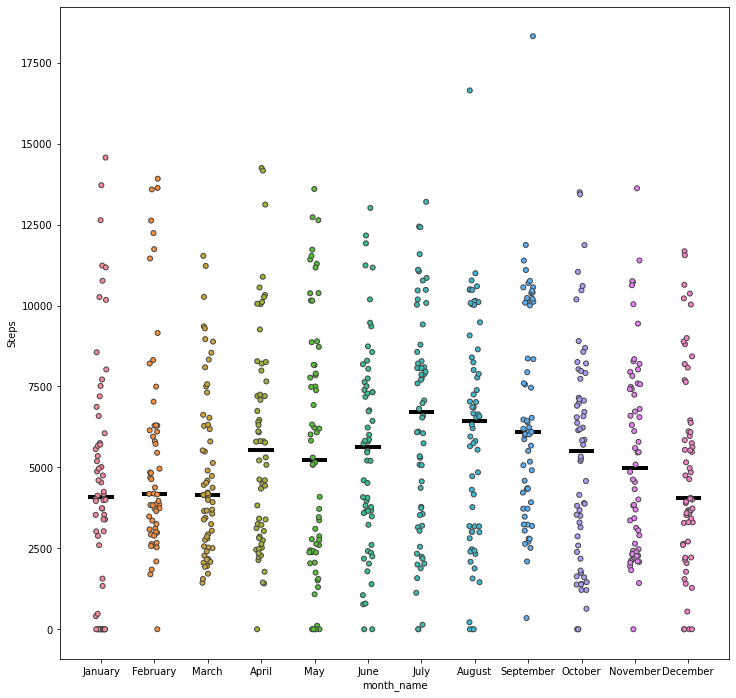

In [12]:
#Stripplot with the median line was built using help from Stackoverflow
#https://stackoverflow.com/questions/37619952/drawing-points-with-with-median-lines-in-seaborn-using-stripplot  

'''
x - x axis  values
y - y axis values
xlabel - label for x axis
ylabel - label for y axis

'''


axis_order = ['January','February','March','April','May','June', 'July','August','September','October','November','December']

x='month_name'
y='Steps'
data=df
xlabel = 'Month'
ylabel = 'Steps'

plotting = plotmedianstrip(data,x, y, xlabel, ylabel,axis_order )



### <font color = 'blue'> Same monthly data represented in a different way more interpretable to the blog audience.  </font>

##  How do the Steps vary day by day? 

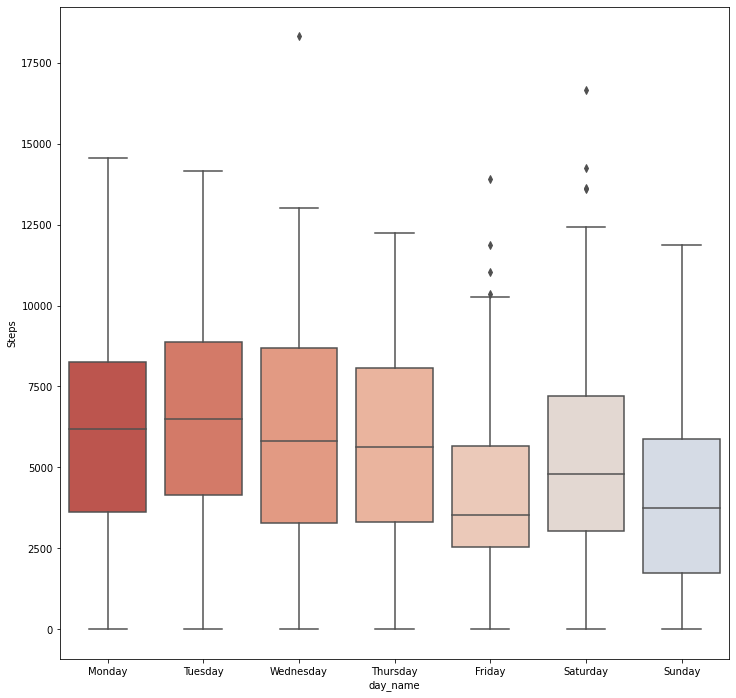

In [13]:
#General box & whisker forday of week using boxwhisker function

'''
x - values for the x-axis
y - values for y-axis
order - the order of the x-axis.  Default is alphabetical
'''

x='day_name'
y='Steps'
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

whiskers=boxwhisker(df,x,y,order)

### <font color = 'blue'>Output shows Friday as the lowest median, max and 75th percentile even when compared to the weekend. Much more consistent Monday through Thursday.  This was unexpected. </font>

In [14]:
#Output the median/stddev by day
df_steps = df[['Steps','day_name']]
df_steps.groupby('day_name').median().unstack(1).sort_values(ascending=False)
#df_steps.groupby('day_name').std().unstack(1).sort_values(ascending=False)


       day_name 
Steps  Tuesday      6509.0
       Monday       6191.5
       Wednesday    5823.0
       Thursday     5621.0
       Saturday     4799.5
       Sunday       3742.0
       Friday       3526.0
dtype: float64

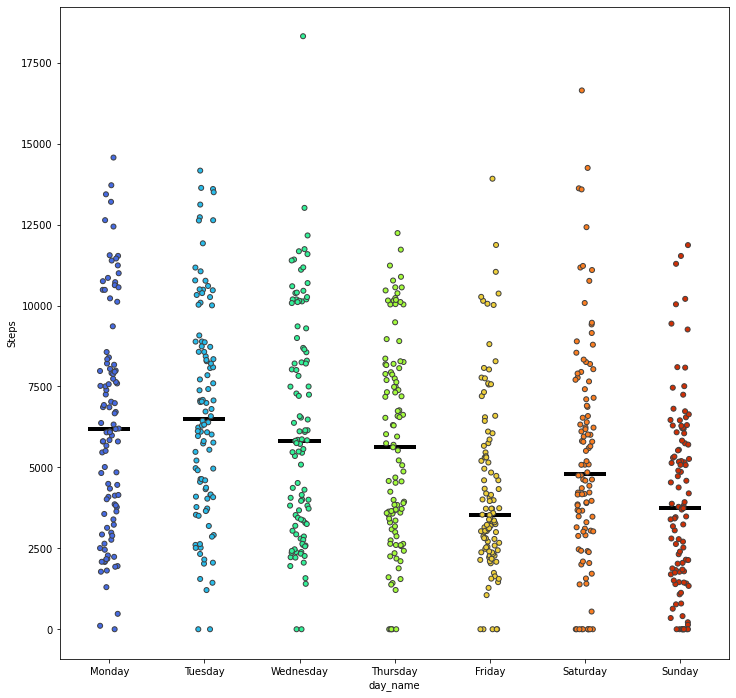

In [15]:
#Stripplot with the median line was built using help from Stackoverflow
#https://stackoverflow.com/questions/37619952/drawing-points-with-with-median-lines-in-seaborn-using-stripplot  

'''
x - x axis  values
y - y axis values
xlabel - label for x axis
ylabel - label for y axis

'''


axis_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

x='day_name'
y='Steps'
data=df
xlabel = 'Day of Week'
ylabel = 'Steps'

plotstrip = plotmedianstrip(data,x, y, xlabel, ylabel,axis_order )



### How to weekday and weekend steps compare? 

C:\Users\E073462\Anaconda3\envs\deep-learning-env\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\E073462\Anaconda3\envs\deep-learning-env\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


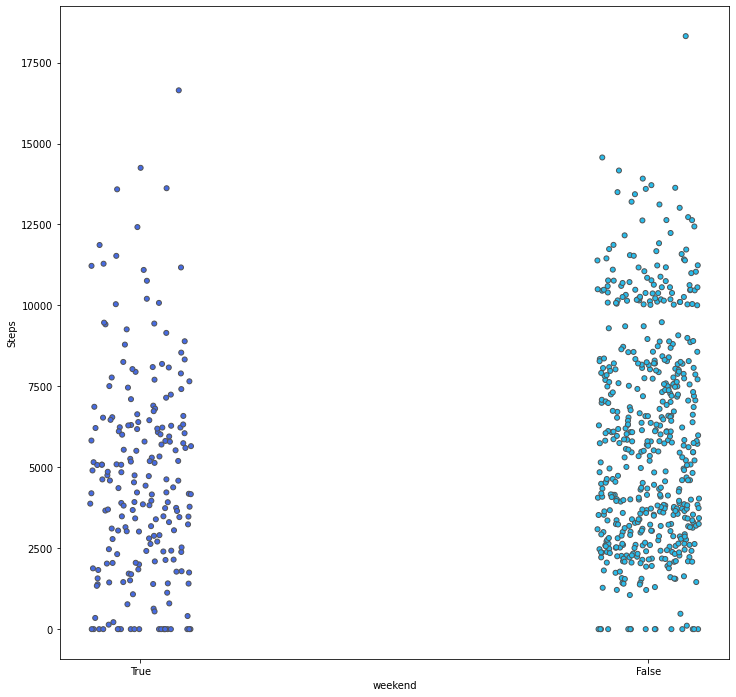

In [16]:
#Use stripplot to show distribution of the boolean weekend v alue side-by-side. 

'''
x - x axis  values
y - y axis values
xlabel - label for x axis
ylabel - label for y axis

'''


x='weekend'
y='Steps'
data=df
xlabel = 'Is Weekend?'
ylabel = 'Steps'

axis_order = [True , False]

plotstrip = plotmedianstrip(data,x, y, xlabel, ylabel,axis_order )





### Does high intensity mean more calories per step?

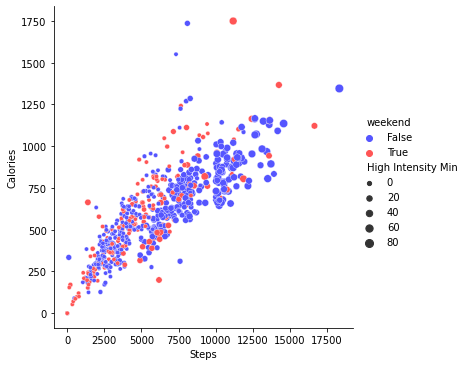

In [17]:
# Compare Weekday/Weekend Activity and visually identify the size based on the amount of High Intensity activity.

sns.set_palette('seismic',2)
sns.relplot(
    data=df,
    x='Steps', y='Calories', hue ='weekend',
    #col = 'day_of_week'
    size='High Intensity Min'
)

### <font color = 'blue'> Size indicates the number of high intensity minutes. Moving lower left to upper right as intensity increases, so does step count. Based on my walking stlye this was my expectation for me.  </font>

## What does the feature importance indicate about the the Steps taken?

In [18]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from xgboost import plot_importance
from sklearn.metrics import r2_score


clf = XGBRegressor()



In [19]:
def fit_importance(df_test,target,to_drop):
    
    
    '''
    INPUT
    df_test - pandas dataframe to test
    target - the target 'y' variable
    
    OUTPUT
    no output returned
    output printed and graph generated within function
    
    This function fits an XGBoost regression model on the dat a provided by performaing the following steps:
    1. Drop bool, object & date columns
    2. Divide X & y based on the target variable provided
    3. Train/test split
    4. Build XGBRegressor model
    5. Fit the model
    6. identify and output the feature importance values & bar graph
    7. Calculate and generate the r-squared value
    '''
    
    #Drop columns
    df_test.drop(to_drop, axis=1, inplace=True)
    
    
    #Split train & test data
    X = df_test.drop([target], axis=1)
    y = df_test[target]

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    
    
    clf = XGBRegressor( random_state = 42)
    
    clf.fit(X_train, y_train)
    
    # feature importance
    
     
    importances =  clf.feature_importances_
    print(importances)
    
    plot_features = pd.Series(clf.feature_importances_, index=X_train.columns)
    plot_features.nlargest(3).plot(kind='barh')
    
    y_pred = clf.predict(X_test)
    print(r2_score(y_test, y_pred))

    return 



### Weekday Feature Importance

C:\Users\E073462\Anaconda3\envs\deep-learning-env\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[0.05192882 0.02771322 0.90507543 0.01528254]
0.7966295201789295


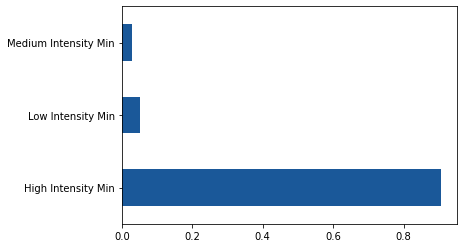

In [20]:
#Use the 'fit_importance' to fit the model and output the feature importance for the weekdays
#Are the steps characterized by the same feature on weekend and weekday?

'''
drop_list - list of values to drop from the dataframe
target - value to predict
'''

drop_list = ['day_name','weekend','Date','Calories']
target = 'Steps'

sns.set_palette('RdBu_r',12)

features = fit_importance(df_weekday,target,drop_list)


### <font color = 'blue'> Feature most indicative of weekend Steps is the High Intensity Minutes. High Intensity has significant importance over the other features (over 80%) </font>


### Weekend Feature Importance

C:\Users\E073462\Anaconda3\envs\deep-learning-env\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[0.18551423 0.2799364  0.5102152  0.02433419]
0.8507825018023788


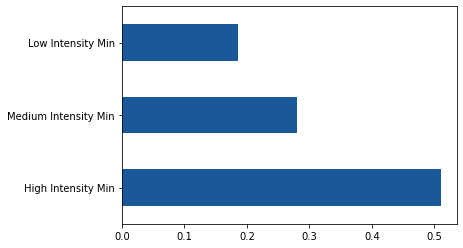

In [21]:
#Use the 'fit_importance' to fit the model and output the feature importance for the weekend days
#Are the steps characterized by the same feature on weekend and weekday?


'''
drop_list - list of values to drop from the dataframe
target - value to predict
'''

drop_list = ['day_name','weekend','Date','Calories']
target = 'Steps'

features = fit_importance(df_weekend, target ,drop_list)





### <font color = 'blue'> Feature most indicative of weekday Steps is also the High Intensity Minutes. But the importance is less than 50% and much more comparable to the other ranges. </font>


### How does the intensity distribution compare each day?

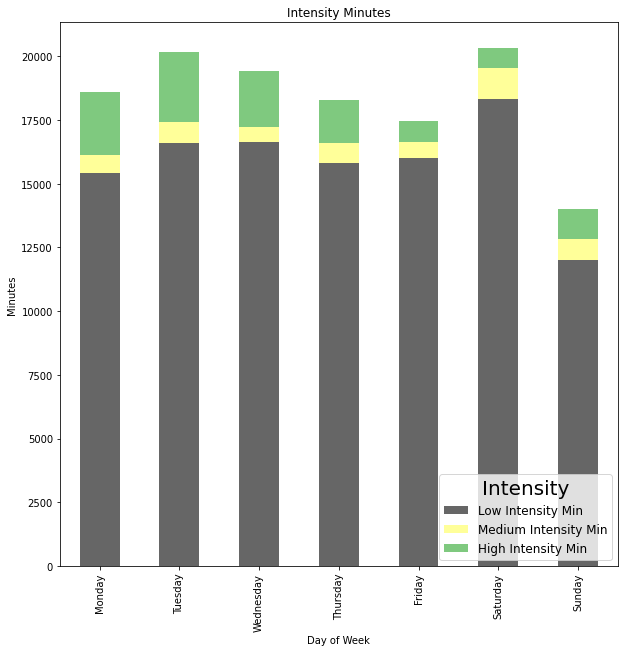

In [22]:
#This bar graph was built for the less technical audience that won't understand feature importance or a Shapely graph 
#that I generally use when I analyze the data. This will be included in the blog post. 


df = df.sort_values('day_of_week')
df_bar = df.drop(['Date','Steps','Calories','weekend'], axis = 1).sort_values('day_of_week')


df_bar

df_bar = df_bar.groupby('day_name').sum()[['Low Intensity Min','Medium Intensity Min','High Intensity Min']]
#df_bar = df_bar.apply(lambda x: x*100/sum(x),axis = 1)
df_bar = df_bar.apply(lambda x: x,axis = 1)
df_bar.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(
    kind='bar', title='Intensity Minutes', ylabel='Minutes', stacked = True, colormap='Accent_r',
    xlabel='Day of Week', figsize=(10, 10))
plt.legend(loc='lower right' ,title='Intensity',fontsize = 12,title_fontsize =20)



### <font color = 'blue'> Saturday has most intensity minutes even though most are low intensity.  Intensity is determined by heartrate.  Saturdays are active throughout the day but the activity does not raise the heartrate as much as other days?  (Causal observation) </font>